# Import Need Modules


In [ ]:
import numpy as np                      # Importation de la bibliothèque NumPy pour les opérations mathématiques
import pandas as pd                     # Importation de la bibliothèque Pandas pour la manipulation des données tabulaires
import os                              # Importation de la bibliothèque os pour interagir avec le système d'exploitation (par exemple, lire des fichiers)
import time                            # Importation de la bibliothèque time pour mesurer le temps d'exécution du code
import matplotlib.pyplot as plt        # Importation de la bibliothèque Matplotlib pour la visualisation des données en utilisant des graphiques
import cv2                             # Importation de la bibliothèque OpenCV pour le traitement d'images
import seaborn as sns                  # Importation de la bibliothèque Seaborn pour la visualisation statistique des données
sns.set_style('ticks')              # Configuration du style des graphiques de Seaborn
import shutil                          # Importation de la bibliothèque shutil pour effectuer des opérations de manipulation de fichiers/dossiers
from sklearn.metrics import confusion_matrix, classification_report   # Importation des métriques d'évaluation des modèles de classification
from sklearn.model_selection import train_test_split                 # Importation de la fonction pour diviser les données en ensembles d'entraînement et de test
import tensorflow as tf                  # Importation de la bibliothèque TensorFlow pour la création et l'entraînement de modèles d'apprentissage automatique
from tensorflow import keras             # Importation de la bibliothèque Keras, qui est une interface haut niveau pour TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator   # Importation de la classe pour la génération d'images augmentées
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization   # Importation des couches du réseau de neurones
from tensorflow.keras.optimizers import Adam, Adamax                  # Importation des optimiseurs pour l'entraînement du modèle
from tensorflow.keras.metrics import categorical_crossentropy        # Importation de la fonction de perte utilisée pour évaluer les performances du modèle
from tensorflow.keras import regularizers                              # Importation des régularisations pour contrôler l'overfitting
from tensorflow.keras.models import Model                             # Importation de la classe Model pour construire le modèle
import logging                         # Importation de la bibliothèque logging pour la gestion des messages d'erreur
logging.getLogger("tensorflow").setLevel(logging.ERROR)  # Configuration pour ignorer les avertissements de TensorFlow

import warnings                       # Importation de la bibliothèque warnings pour gérer les avertissements
##pd.set_option('max_columns', None)
pd.options.display.max_columns = None     # Configuration pour afficher toutes les colonnes des DataFrames
##pd.set_option('max_rows', 90)
pd.options.display.max_rows = 90          # Configuration pour afficher jusqu'à 90 lignes dans les DataFrames
warnings.simplefilter("ignore")           # Configuration pour ignorer les avertissements


## GRAD-CAM :
import cv2
import numpy as np
from tensorflow.keras.models import Model


# Monter le drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
sdir = '/content/drive/MyDrive/A_Stage/BDDS4C'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sdir = r'/content/drive/MyDrive/A_Stage/BDDS4C'     # Chemin du répertoire contenant les données d'entraînement, de test et de validation

ht = 0                            # Hauteur totale des images
wt = 0                            # Largeur totale des images
samples = 0                       # Nombre total d'échantillons
sample_count = 10                 # Nombre d'échantillons à utiliser pour calculer la moyenne des dimensions des images

for dataset in ['train', 'test', 'val']:           # Boucle pour chaque ensemble de données (train, test, val)
    filepaths = []                                 # Liste pour stocker les chemins des fichiers d'images
    labels = []                                    # Liste pour stocker les étiquettes des images
    datapath = os.path.join(sdir, dataset)          # Chemin vers le répertoire de l'ensemble de données spécifique
    classlist = os.listdir(datapath)                # Liste des classes (répertoires) présentes dans l'ensemble de données

    for klass in classlist:                         # Boucle pour chaque classe
        classpath = os.path.join(datapath, klass)    # Chemin vers le répertoire de la classe spécifique
        flist = os.listdir(classpath)                # Liste des fichiers d'images dans le répertoire de la classe

        for i, f in enumerate(flist):                 # Boucle pour chaque fichier d'image
            fpath = os.path.join(classpath, f)        # Chemin complet vers le fichier d'image
            filepaths.append(fpath)                   # Ajout du chemin du fichier à la liste
            labels.append(klass)                      # Ajout de l'étiquette de la classe à la liste

            if i < sample_count:
               # Vérification si l'échantillon fait partie des échantillons utilisés pour calculer la moyenne
                img = plt.imread(fpath)                 # Lecture de l'image à l'aide de Matplotlib
                ht += img.shape[0]                       # Ajout de la hauteur de l'image à la somme totale des hauteurs
                wt += img.shape[1]                       # Ajout de la largeur de l'image à la somme totale des largeurs
                samples += 1                             # Incrémentation du nombre total d'échantillons

    Fseries = pd.Series(filepaths, name='filepaths')     # Conversion de la liste des chemins en une série Pandas
    Lseries = pd.Series(labels, name='labels')           # Conversion de la liste des étiquettes en une série Pandas

    if dataset == 'train':                                # Vérification de l'ensemble de données (train, test, val)
        train_df = pd.concat([Fseries, Lseries], axis=1)   # Concaténation des séries en un DataFrame pour l'ensemble de données d'entraînement
    elif dataset == 'test':
        test_df = pd.concat([Fseries, Lseries], axis=1)    # Concaténation des séries en un DataFrame pour l'ensemble de données de test
    else:
        valid_df = pd.concat([Fseries, Lseries], axis=1)   # Concaténation des séries en un DataFrame pour l'ensemble de données de validation

print('train_df length:', len(train_df), 'test_df length:', len(test_df), 'valid_df length:', len(valid_df))



train_df length: 3197 test_df length: 801 valid_df length: 1997


la dernière couche convolutionnelle n'est pas directement accessible car le modèle EfficientNetB5 est utilisé comme base et sa couche de classification a été retirée. Cependant, vous pouvez accéder à la dernière couche de convolution avant le pooling global en utilisant la méthode get_layer avec le nom de la couche précédente au pooling global. Donc : **last_conv_layer = base_model.get_layer('top_activation')** car La couche **'top_activation'** est la dernière couche de convolution avant le pooling global dans le modèle EfficientNetB5.






# Trim the train_df data frame
train_df is balanced and has a large number of sample images.
to reduce training time limit the maximum
number of samples in a class to 500 using the trim function below

In [ ]:
def trim(df, max_size, min_size, column):
    df = df.copy()                                    # Copie du DataFrame pour éviter de modifier l'original
    original_class_count = len(list(df[column].unique()))    # Nombre de classes uniques dans la colonne spécifiée du DataFrame
    print('Original Number of classes in dataframe:', original_class_count)
    sample_list = []                                   # Liste pour stocker les échantillons sélectionnés

    groups = df.groupby(column)                        # Regroupement des données en fonction de la colonne spécifiée

    for label in df[column].unique():                   # Boucle pour chaque classe unique dans la colonne
        group = groups.get_group(label)                   # Obtention du groupe de données pour la classe spécifique
        sample_count = len(group)                           # Nombre d'échantillons dans le groupe

        if sample_count > max_size:                          # Vérification si le groupe dépasse la taille maximale souhaitée
            strat = group[column]                             # Colonne utilisée pour stratifier l'échantillonnage
            samples, _ = train_test_split(group, train_size=max_size, shuffle=True, random_state=123, stratify=strat)    # Échantillonnage aléatoire avec stratification pour obtenir la taille maximale
            sample_list.append(samples)                         # Ajout des échantillons sélectionnés à la liste
        elif sample_count >= min_size:                         # Vérification si le groupe atteint ou dépasse la taille minimale souhaitée
            sample_list.append(group)                             # Ajout du groupe tel quel à la liste

    df = pd.concat(sample_list, axis=0).reset_index(drop=True)   # Concaténation des échantillons sélectionnés pour former un nouveau DataFrame
    final_class_count = len(list(df[column].unique()))            # Nombre de classes uniques dans le nouveau DataFrame

    if final_class_count != original_class_count:                  # Vérification si le nombre de classes a été réduit
        print('*** WARNING ***  dataframe has a reduced number of classes')

    balance = list(df[column].value_counts())                      # Nombre d'échantillons par classe dans le nouveau DataFrame
    print(balance)
    return df                                                      # Retourne le nouveau DataFrame


In [ ]:
max_samples = 500                         # Nombre maximal d'échantillons par classe
min_samples = 0                           # Nombre minimal d'échantillons par classe
column = 'labels'                         # Nom de la colonne utilisée pour la sélection des échantillons

train_df = trim(train_df, max_samples, min_samples, column)   # Appel de la fonction trim pour sélectionner les échantillons dans train_df

img_size = (200, 250)                     # Taille des images à utiliser
working_dir = r'./'                       # Répertoire de travail


Original Number of classes in dataframe: 4
[500, 500, 500, 500]


# Générer lesheatmaps Grad-CAM

In [ ]:
def generate_grad_cam(model, image):
    last_conv_layer = base_model.get_layer('top_activation')  # Remplacez 'nom_de_la_dernière_couche_convolutionnelle' par le nom de votre dernière couche conv.

    # Créez un nouveau modèle tronqué pour obtenir les sorties de la dernière couche conv. et la prédiction
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, np.argmax(predictions[0])]

    # Calculez les gradients de la sortie par rapport à la sortie de la dernière couche conv.
    grads = tape.gradient(loss, conv_outputs)

    # Calculez les poids des features maps en moyennant les gradients spatiaux
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multipliez chaque canal de la feature map par son poids de gradient moyen
    for i in range(conv_outputs.shape[-1]):
        conv_outputs[:, :, :, i] *= pooled_grads[i]

    # Calculez le heatmap en moyennant les feature maps pondérées
    heatmap = np.mean(conv_outputs, axis=-1)

    # Normalisez le heatmap entre 0 et 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap


 Le modèle EfficientNetB5 est utilisé comme modèle de base. La dernière couche convolutionnelle de ce modèle est inclus dans base_model. Cependant, puisque la couche de classification est retirée en utilisant include_top=False, la dernière couche du modèle EfficientNetB5 est en fait un pooling global (GlobalMaxPooling2D) qui est utilisé comme sortie (x = base_model.output).

Donc, dans ce cas, la dernière couche convolutionnelle du modèle est en fait le pooling global.

# Create the train_gen, test_gen and valid_gen

In [ ]:
batch_size = 34 #30 de base      # 32 max                                         # Taille du lot (nombre d'images par lot)

trgen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, width_shift_range=.2,
                           height_shift_range=.2, zoom_range=.2)    # Générateur de données pour l'entraînement avec des transformations aléatoires

t_and_v_gen = ImageDataGenerator()                            # Générateur de données pour la validation et les tests (sans transformations)

train_gen = trgen.flow_from_dataframe(train_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                      class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=batch_size)
                                      # Générateur de lot pour les données d'entraînement

valid_gen = t_and_v_gen.flow_from_dataframe(valid_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                            class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=batch_size)
                                            # Générateur de lot pour les données de validation

length = len(test_df)
test_batch_size = sorted([int(length/n) for n in range(1, length+1) if length % n == 0 and length/n <= 80], reverse=True)[0]
                                 # Taille du lot pour les données de test, calculée de manière à couvrir toutes les données en une seule itération
test_steps = int(length/test_batch_size)                     # Nombre d'étapes de test

test_gen = t_and_v_gen.flow_from_dataframe(test_df, x_col='filepaths', y_col='labels', target_size=img_size,
                                           class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size)
                                           # Générateur de lot pour les données de test

classes = list(train_gen.class_indices.keys())                # Liste des noms de classes
class_indices = list(train_gen.class_indices.values())        # Liste des indices de classes
class_count = len(classes)                                    # Nombre de classes
labels = test_gen.labels                                      # Étiquettes des données de test

print('test batch size:', test_batch_size, 'test steps:', test_steps, 'number of classes:', class_count)
print('{0:^25s}{1:^12s}'.format('class name', 'class index'))
for klass, index in zip(classes, class_indices):
    print(f'{klass:^25s}{str(index):^12s}')


Found 2000 validated image filenames belonging to 4 classes.
Found 1997 validated image filenames belonging to 4 classes.
Found 801 validated image filenames belonging to 4 classes.
test batch size: 9 test steps: 89 number of classes: 4
       class name        class index 
        0_normal              0      
  1_ulcerative_colitis        1      
        2_polyps              2      
      3_esophagitis           3      


#Create a function to show example training images


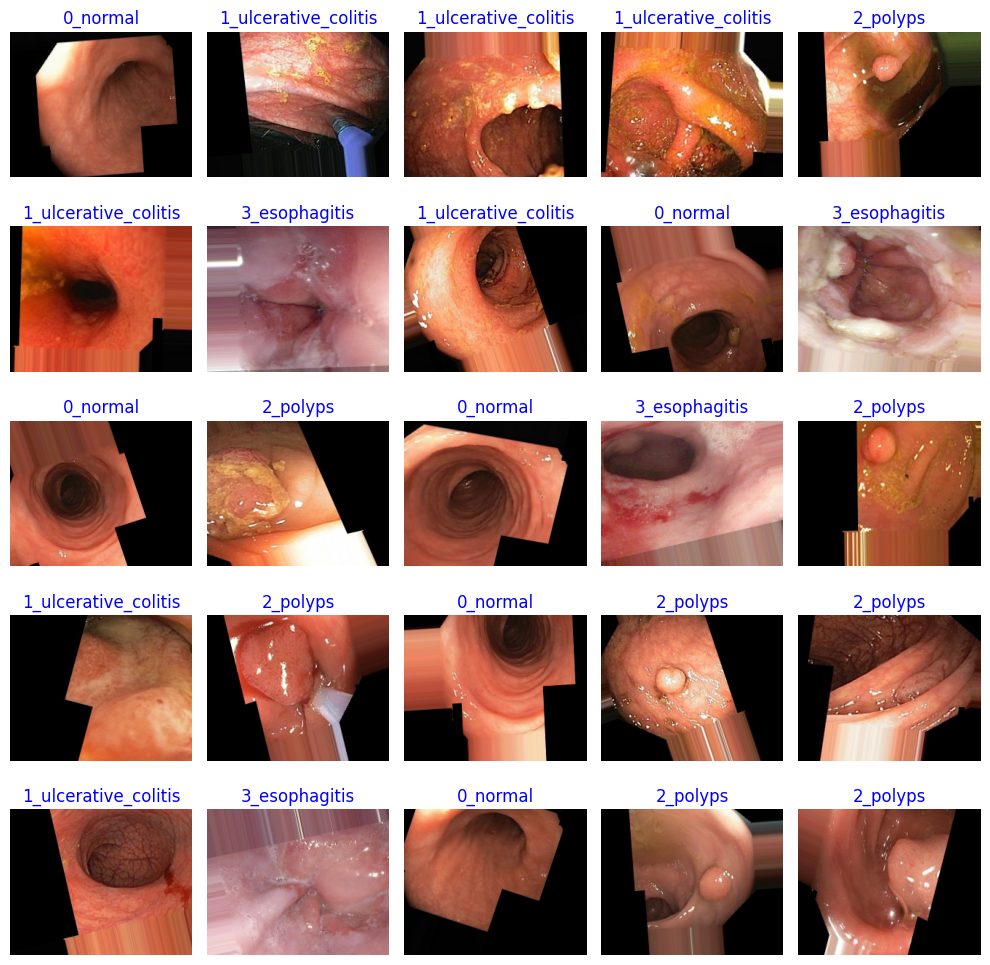

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_image_samples(gen, max_images=25):
    t_dict = gen.class_indices  # Dictionnaire des indices de classes
    classes = list(t_dict.keys())  # Liste des noms de classes
    images, labels = next(gen)  # Obtenir un lot d'échantillons à partir du générateur

    fig, axes = plt.subplots(5, 5, figsize=(10, 10))  # Créer une nouvelle figure avec une grille 5x5 pour afficher les images

    for i, ax in enumerate(axes.flat):
        if i < max_images and i < len(labels):
            image = images[i] / 255  # Normaliser les valeurs des pixels entre 0 et 1
            ax.imshow(image)  # Afficher l'image

            index = np.argmax(labels[i])  # Obtenir l'indice de classe correspondant à l'échantillon
            class_name = classes[index]  # Obtenir le nom de classe correspondant à l'indice

            ax.set_title(class_name, color='blue', fontsize=12)  # Afficher le nom de classe comme titre de l'image
            ax.axis('off')  # Désactiver les axes
        else:
            ax.axis('off')  # Désactiver les axes pour les sous-figures vides

    plt.tight_layout()  # Ajuster la disposition des sous-figures pour un affichage optimal
    plt.show()  # Afficher la figure contenant les images

show_image_samples(train_gen, max_images=25)


# Create a model using transfer learning with EfficientNetB5




In [ ]:
#CELUI QUI FONCTIONNE
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adamax

# Importe les bibliothèques nécessaires, notamment TensorFlow, Keras et le modèle EfficientNetB3.

img_shape = (img_size[0], img_size[1], 3)  # Forme des images qui seront utilisées en entrée du modèle (hauteur, largeur, nombre de canaux)

# Augmentation des données d'entraînement
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal")
])

# Charge le modèle de base EfficientNetB3 pré-entraîné sur le jeu de données ImageNet, sans la couche de classification.
base_model = EfficientNetB3(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')

# Rend le modèle de base entraînable (contrairement à la recommandation habituelle).
base_model.trainable = True

# Reçoit les sorties du modèle de base.
x = base_model.output

# Utilise une couche de normalisation par lots pour stabiliser les valeurs des neurones.
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)

# Utilise une couche dense pour ajouter des couches d'entités au modèle.
x = Dense(1024, kernel_regularizer=regularizers.l2(l=0.016),
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu')(x)

# Utilise une couche de dropout pour empêcher le surapprentissage.
x = Dropout(rate=0.3, seed=123)(x)

# Utilise une couche dense pour ajouter des couches d'entités au modèle.
x = Dense(128, kernel_regularizer=regularizers.l2(l=0.016),
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006), activation='relu')(x)

# Utilise une couche de dropout pour empêcher le surapprentissage.
x = Dropout(rate=0.45, seed=123)(x)

# Crée une couche de sortie avec le nombre de neurones correspondant au nombre de classes de la tâche de classification.
output = Dense(class_count, activation='softmax')(x)

# Crée un modèle à partir du modèle de base et de la couche de sortie.
model = Model(inputs=base_model.input, outputs=output)

# Définit le taux d'apprentissage initial.
lr = 0.001

# Compile le modèle en utilisant l'optimiseur Adam et la fonction de perte entropie croisée catégorique.
model.compile(Adamax(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])


Le code définit un modèle basé sur l'architecture EfficientNetB5 pré-entraînée sur ImageNet. Le modèle comprend des couches de convolution et de pooling pré-entraînées, suivies de couches entièrement connectées et d'une couche de sortie softmax. Les couches entièrement connectées sont régularisées avec des régularisations L2 et L1, et des couches de dropout sont ajoutées pour la régularisation. Le modèle est compilé avec l'optimiseur Adamax, la fonction de perte catégorielle et la métrique de précision.

# Create a custom Keras callback to continue or halt training

In [ ]:
class ASK(keras.callbacks.Callback):
    def __init__(self, model, epochs, ask_epoch):
        super(ASK, self).__init__()
        self.model = model
        self.ask_epoch = ask_epoch
        self.epochs = epochs
        self.ask = True  # Si True, demander à l'utilisateur à une epoch spécifique

    def on_train_begin(self, logs=None):
        if self.ask_epoch == 0:
            print('vous avez défini ask_epoch = 0, ask_epoch sera défini à 1', flush=True)
            self.ask_epoch = 1
        if self.ask_epoch >= self.epochs:
            print("ask_epoch >= epochs, l'entraînement se fera sur", epochs, "epochs", flush=True)
            self.ask = False  # Ne pas demander à l'utilisateur
        if self.epochs == 1:
            self.ask = False  # Entraînement sur une seule epoch, ne pas demander à l'utilisateur
        else:
            print("L'entraînement se poursuivra jusqu'à l'epoch', ask_epoch, 'puis vous serez invité à")
            print("entrer 'H' pour arrêter l'entraînement ou un entier pour continuer l'entraînement", flush=True)
        self.start_time = time.time()  # Enregistrer l'heure de début de l'entraînement

    def on_train_end(self, logs=None):
        tr_duration = time.time() - self.start_time  # Calculer la durée de l'entraînement
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))
        msg = f"Le temps écoulé pour l'entraînement était de {str(hours)} heures, {minutes:4.1f} minutes, {seconds:4.2f} secondes)"
        print(msg, flush=True)  # Afficher la durée de l'entraînement

    def on_epoch_end(self, epoch, logs=None):
        if self.ask:
            if epoch + 1 == self.ask_epoch:
                print("\nEntrez 'H' pour arrêter l'entraînement ou un entier pour continuer l'entraînement puis demander à nouveau")
                ans = input()

                if ans == 'H' or ans =='h' or ans == '0':
                    print("Vous avez saisi", ans, "L'entraînement est arrêté à l'epoch", epoch+1, "suite à l'entrée de l'utilisateur\n", flush=True)
                    self.model.stop_training = True  # Arrêter l'entraînement
                else:
                    self.ask_epoch += int(ans)
                    if self.ask_epoch > self.epochs:
                        print("\nVous avez spécifié un nombre maximal d'epochs de", self.epochs, "Impossible de continuer jusqu'à", self.ask_epoch, flush=True)
                    else:
                        print("Vous avez saisi", ans, "L'entraînement se poursuivra jusqu'à l'epoch", self.ask_epoch, flush=True)


La classe ASK est une classe de rappel (Callback) personnalisée pour l'entraînement d'un modèle. Elle permet de demand

# Instantiate custom callback and create 2 callbacks to control learning rate and early stop

In [ ]:
# epochs = int(input("Veuillez entrer le nombre total d'epochs pour l'entraînement du modèle : "))
# rlronp = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1)  # Rappel de réduction du taux d'apprentissage
# estop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1, restore_best_weights=True)  # Rappel d'arrêt précoce
# callbacks = [rlronp, estop]  # Liste des rappels à utiliser pendant l'entraînement du modèle


In [ ]:
epochs = int(input("Veuillez entrer le nombre total d'epochs pour l'entraînement du modèle : "))
# rlronp = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1)  # Rappel de réduction du taux d'apprentissage
# estop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1, restore_best_weights=True)  # Rappel d'arrêt précoce
# callbacks = [rlronp, estop]  # Liste des rappels à utiliser pendant l'entraînement du modèle


Veuillez entrer le nombre total d'epochs pour l'entraînement du modèle : 15


# Train the model
Note unlike how you are told it is BETTER to make the base model trainable from the outset
It will converge faster and have a lower validation losss

In [ ]:
history = model.fit(
    x=train_gen,  # Générateur de données pour l'entraînement
    epochs=epochs,  # Nombre total d'epochs pour l'entraînement
    verbose=1,  # Affichage des détails de l'entraînement
    # callbacks=callbacks,  # Liste des rappels à utiliser pendant l'entraînement
    validation_data=valid_gen,  # Générateur de données pour la validation
    validation_steps=None,  # Nombre d'étapes de validation par epoch (par défaut, utilise la taille du générateur)
    shuffle=False,  # Ne pas mélanger les données du générateur
    initial_epoch=0  # Epoch de départ pour l'entraînement
)

Epoch 1/15
59/59 [==============================] - 116s 891ms/step - loss: 22.6182 - accuracy: 0.8260 - val_loss: 22.2206 - val_accuracy: 0.8097
Epoch 2/15
59/59 [==============================] - 51s 860ms/step - loss: 15.5647 - accuracy: 0.9360 - val_loss: 14.2157 - val_accuracy: 0.9339
Epoch 3/15
59/59 [==============================] - 53s 889ms/step - loss: 11.6854 - accuracy: 0.9580 - val_loss: 10.1770 - val_accuracy: 0.9094
Epoch 4/15
59/59 [==============================] - 54s 913ms/step - loss: 8.9536 - accuracy: 0.9775 - val_loss: 7.8838 - val_accuracy: 0.9359
Epoch 5/15
59/59 [==============================] - 53s 892ms/step - loss: 6.9692 - accuracy: 0.9785 - val_loss: 6.1021 - val_accuracy: 0.9680
Epoch 6/15
59/59 [==============================] - 50s 844ms/step - loss: 5.4455 - accuracy: 0.9830 - val_loss: 4.7747 - val_accuracy: 0.9835
Epoch 7/15
59/59 [==============================] - 52s 872ms/step - loss: 4.2896 - accuracy: 0.9855 - val_loss: 3.7486 - val_accuracy:

entraîner le modèle en utilisant les générateurs train_gen et valid_gen, les paramètres d'entraînement spécifiés dans epochs, callbacks et les autres arguments de la méthode fit.

# Définir une fonction pour tracer les données d'entraînement
Le bloc de code fourni permet de tracer la courbe de la perte d'entraînement et de validation ainsi que la courbe de l'exactitude d'entraînement et de validation. Il extrait les valeurs de perte et d'exactitude à partir des données d'entraînement (tr_data) et détermine l'époque avec la plus faible perte de validation et la plus haute exactitude de validation.

En utilisant matplotlib et seaborn, le code crée une figure avec deux sous-graphiques. Le premier sous-graphique représente la perte d'entraînement et de validation, avec des points marquant l'époque ayant la plus faible perte de validation. Le deuxième sous-graphique représente l'exactitude d'entraînement et de validation, avec des points marquant l'époque ayant la plus haute exactitude de validation.

Les titres, les libellés des axes et les légendes sont ajoutés aux sous-graphiques pour une meilleure lisibilité. Enfin, la figure est affichée.

En résumé, ce bloc de code permet de visualiser l'évolution de la perte et de l'exactitude d'entraînement et de validation au fil des époques, mettant en évidence les époques avec les meilleures performances en termes de perte et d'exactitude de validation.

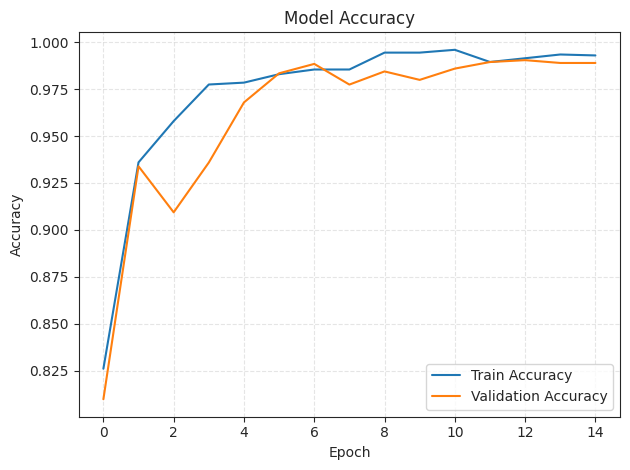

In [ ]:
# Plot accuracy vs epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')  # Tracé de la courbe de précision d'entraînement en fonction des epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Tracé de la courbe de précision de validation en fonction des epochs
plt.title('Model Accuracy')  # Titre du graphe affiché
plt.xlabel('Epoch')  # Étiquette de l'axe des abscisses indiquant "Epoch"
plt.ylabel('Accuracy')  # Étiquette de l'axe des ordonnées indiquant "Accuracy" (précision)
plt.legend(loc='lower right')  # Affichage de la légende dans le coin inférieur droit
plt.grid(True, linestyle='--', alpha=0.5)  # Affichage de la grille en pointillés avec une transparence de 0.5
plt.tight_layout()  # Ajustement automatique de la disposition des éléments du graphe
plt.show()  # Affichage du graphe


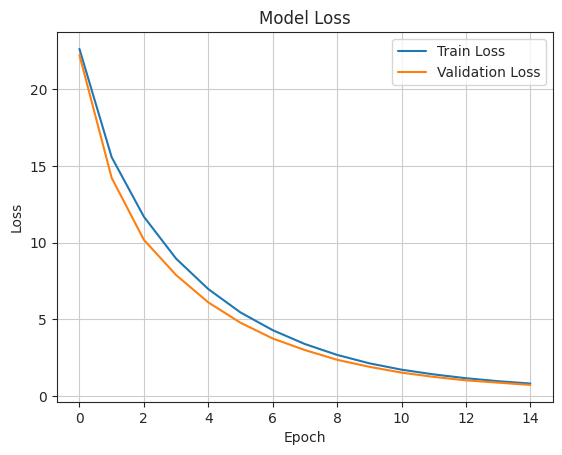

In [ ]:
# Plot loss vs epochs
plt.plot(history.history['loss'], label='Train Loss')  # Tracé de la courbe de perte d'entraînement en fonction des epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Tracé de la courbe de perte de validation en fonction des epochs
plt.title('Model Loss')  # Titre du graphe affiché
plt.xlabel('Epoch')  # Étiquette de l'axe des abscisses indiquant "Epoch"
plt.ylabel('Loss')  # Étiquette de l'axe des ordonnées indiquant "Loss"
plt.legend()  # Affichage de la légende indiquant les courbes pour l'entraînement et la validation
plt.grid(True)  # Affichage de la grille
plt.show()  # Affichage du graphe


# Effectuer des prédictions sur l'ensemble de test, créer une matrice de confusion et afficher les résultats de classification

Le but de cette étape est d'utiliser le modèle entraîné pour faire des prédictions sur un ensemble de données de test. Ensuite, en utilisant les prédictions et les vraies étiquettes des données de test, on crée une matrice de confusion. La matrice de confusion permet d'évaluer les performances du modèle en fournissant des informations sur le nombre de prédictions correctes et incorrectes pour chaque classe. Enfin, les résultats de classification permettent de quantifier et d'analyser les performances du modèle en termes de précision, de rappel, de score F1, etc. Cela permet de mesurer l'efficacité du modèle dans la classification des différentes classes du problème.

89/89 [==============================] - 6s 46ms/step
Il y a eu 9 erreurs sur 801 tests, ce qui correspond à une précision de  98.88%


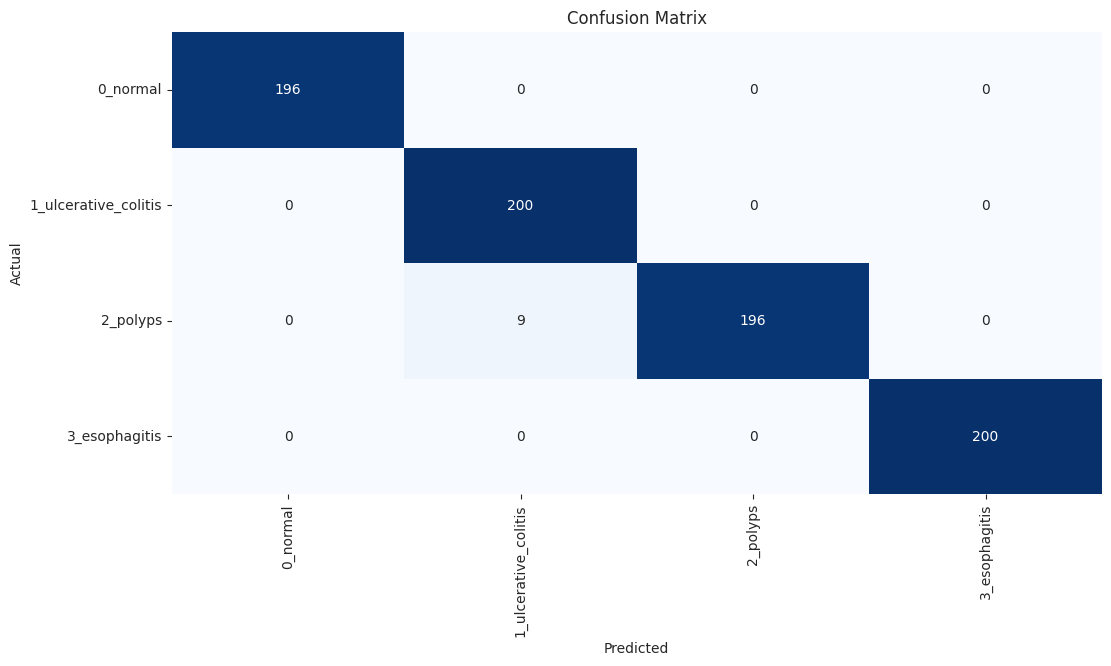

Classification Report:
----------------------
                       precision    recall  f1-score   support

            0_normal     1.0000    1.0000    1.0000       196
1_ulcerative_colitis     0.9569    1.0000    0.9780       200
            2_polyps     1.0000    0.9561    0.9776       205
       3_esophagitis     1.0000    1.0000    1.0000       200

            accuracy                         0.9888       801
           macro avg     0.9892    0.9890    0.9889       801
        weighted avg     0.9892    0.9888    0.9888       801

Images provoquant des erreurs :
/content/drive/MyDrive/A_Stage/BDDS4C/test/2_polyps/test_polyps_ (21).jpg
/content/drive/MyDrive/A_Stage/BDDS4C/test/2_polyps/test_polyps_ (41).jpg
/content/drive/MyDrive/A_Stage/BDDS4C/test/2_polyps/test_polyps_ (65).jpg
/content/drive/MyDrive/A_Stage/BDDS4C/test/2_polyps/test_polyps_ (86).jpg
/content/drive/MyDrive/A_Stage/BDDS4C/test/2_polyps/test_polyps_ (107).jpg
/content/drive/MyDrive/A_Stage/BDDS4C/test/2_polyps

In [ ]:
y_pred = []
y_true = test_gen.labels
errors = 0

# Prédictions sur l'ensemble de test
preds = model.predict(test_gen, steps=test_steps, verbose=1)

# Calcul du nombre total de tests
tests = len(preds)

# Boucle pour évaluer les prédictions et les étiquettes réelles
for i, p in enumerate(preds):
    pred_index = np.argmax(p)
    true_index = test_gen.labels[i]

    # Vérification des erreurs de classification
    if pred_index != true_index:
        errors += 1

    # Ajout de la prédiction à la liste
    y_pred.append(pred_index)

# Calcul de l'exactitude
acc = (1 - errors/tests) * 100

# Affichage des résultats
print(f"Il y a eu {errors} erreurs sur {tests} tests, ce qui correspond à une précision de {acc:6.2f}%")


# Conversion en tableaux numpy
ypred = np.array(y_pred)
ytrue = np.array(y_true)

# Calcul de la matrice de confusion
cm = confusion_matrix(ytrue, ypred)

# Affichage de la matrice de confusion
plt.figure(figsize=(12, 6))  # Crée une figure avec une taille de 12 pouces de largeur et 6 pouces de hauteur
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)  # Crée un heatmap à partir de la matrice de confusion (cm) avec des annotations, une palette de couleurs 'Blues' et pas de barre de couleur
plt.xticks(np.arange(class_count)+.5, classes, rotation=90)  # Définit les graduations de l'axe des x avec les noms de classes (classes) et les positionne au milieu de chaque cellule
plt.yticks(np.arange(class_count)+.5, classes, rotation=0)  # Définit les graduations de l'axe des y avec les noms de classes (classes) et les positionne au milieu de chaque cellule
plt.xlabel("Predicted")  # Définit le libellé de l'axe des x
plt.ylabel("Actual")  # Définit le libellé de l'axe des y
plt.title("Confusion Matrix")  # Définit le titre du graphique.
plt.show()  # Affiche le graphique


# Création du rapport de classification
clr = classification_report(y_true, y_pred, target_names=classes, digits=4)

# Affichage du rapport de classification
print("Classification Report:\n----------------------\n", clr)

# Ajout de la partie pour afficher les noms des images provoquant des erreurs
error_images = []
for i, p in enumerate(preds):
    pred_index = np.argmax(p)
    true_index = test_gen.labels[i]

    if pred_index != true_index:
        errors += 1
        error_images.append(test_gen.filenames[i])

print("Images provoquant des erreurs :")
for img_name in error_images:
    print(img_name)

Pour interpréter les résultats du rapport de classification, vous pouvez vous référer aux mesures de précision, de rappel et de score F1 pour chaque classe ainsi que les mesures globales telles que l'exactitude, la moyenne macro et la moyenne pondérée.

- Précision (precision) : Il s'agit de la capacité du modèle à classifier correctement les exemples positifs. Une précision élevée indique que le modèle a effectué peu de prédictions erronées de la classe concernée.

- Rappel (recall) : Il représente la capacité du modèle à identifier tous les exemples positifs. Un rappel élevé indique que le modèle a correctement identifié la majorité des exemples de la classe concernée.

- Score F1 (F1-score) : Il est une mesure harmonique de la précision et du rappel. Il fournit une mesure globale de la performance du modèle en combinant les deux mesures précédentes. Un score F1 élevé indique une bonne performance globale du modèle pour la classe concernée.

- Support : Il représente le nombre d'exemples réels de chaque classe dans les données de test.

- Exactitude (accuracy) : C'est le pourcentage d'exemples correctement classifiés par rapport au nombre total d'exemples. Une exactitude élevée indique une bonne performance globale du modèle.

- Moyenne macro (macro avg) : Il s'agit de la moyenne non pondérée des mesures de précision, de rappel et de score F1 pour toutes les classes. Cela donne une idée de la performance globale du modèle sans prendre en compte les déséquilibres de classes.

- Moyenne pondérée (weighted avg) : Il s'agit de la moyenne pondérée des mesures de précision, de rappel et de score F1 pour toutes les classes, en tenant compte du nombre d'exemples de chaque classe. Cela donne une idée de la performance globale du modèle en tenant compte des déséquilibres de classes.

En analysant ces résultats, vous pouvez identifier les classes pour lesquelles le modèle performe le mieux en termes de précision, de rappel et de score F1. Vous pouvez également évaluer la performance globale du modèle en fonction de l'exactitude, de la moyenne macro et de la moyenne pondérée. Si vous souhaitez approfondir l'évaluation, vous pouvez également examiner la matrice de confusion pour avoir une vision plus détaillée des prédictions du modèle pour chaque classe.

# Sauvegarde du modèle


In [ ]:
# Importation des bibliothèques nécessaires
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import glob

# Authentification Google
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Supposons que vous avez déjà défini le modèle et que vous voulez le sauvegarder
# model = ... (votre modèle Keras)

subject = 'colon'
acc = str((1 - errors/tests) * 100)
index = acc.rfind('.')
acc = acc[:index + 3]
base_filename = subject + '_' + str(acc)

# Emplacement du dossier de sauvegarde
save_directory = '/content/drive/MyDrive/A_Stage/Model_Save_MC/'

# Fonction pour demander à l'utilisateur un nouveau nom de modèle
def get_new_model_name(base_filename):
    new_model_name = input("Veuillez saisir un nouveau nom pour le modèle (sans extension .h5) : ")
    while not new_model_name:
        print("Le nom du modèle ne peut pas être vide. Veuillez réessayer.")
        new_model_name = input("Veuillez saisir un nouveau nom pour le modèle (sans extension .h5) : ")

    return new_model_name

# Vérifier si le modèle avec le même nom existe déjà
model_number = 1
model_filename = base_filename + '.h5'
while os.path.exists(os.path.join(save_directory, model_filename)):
    model_number += 1
    model_filename = f"{base_filename}_{model_number}.h5"

# Demander à l'utilisateur de saisir un nouveau nom de modèle (si désiré)
user_input = input("Voulez-vous renommer le modèle avant de l'enregistrer ? (Oui/Non) : ")
if user_input.lower() == 'oui':
    new_model_name = get_new_model_name(base_filename)
    model_filename = new_model_name + '.h5'

# Sauvegarder les poids du modèle
model_save_loc = os.path.join(save_directory, model_filename)
model.save_weights(model_save_loc)

print("Modèle enregistré dans Google Drive avec le nom :", model_filename)

# Obtenir la liste des fichiers avec l'extension .h5 dans le répertoire
h5_files = glob.glob(os.path.join(save_directory, '*.h5'))

# Afficher les noms des fichiers .h5 sous forme de colonne
print("Fichiers .h5 dans le répertoire :")
for h5_file in h5_files:
    print(os.path.basename(h5_file))

# AFFICHER TOUTE LES COUCHES et trouver la dernières couche de convolution


In [ ]:
# from tensorflow.keras.models import Model
# layers = model.layers
# for layer in layers:
#     print(layer.name, layer.__class__.__name__)

#     last_conv_layer = None
# for layer in model.layers:
#     if isinstance(layer, Conv2D):
#         last_conv_layer = layer

# # Vérifiez si la dernière couche de convolution a été trouvée
# if last_conv_layer is not None:
#     print("La dernière couche de convolution est :", last_conv_layer.name)
# else:
#     print("Aucune couche de convolution trouvée dans le modèle.")



# Test heat map


colite ok
polyps : non
oeso :
normal :

Importation des bibliothèques nécessaires :

numpy pour les opérations mathématiques et les manipulations de tableaux.
tensorflow pour la construction et l'exécution du modèle d'apprentissage automatique.
keras pour l'utilisation de modèles pré-entraînés et les opérations sur les images.
IPython.display pour l'affichage des images.
matplotlib.pyplot et matplotlib.cm pour la visualisation des images et des heatmaps.
Définition des paramètres configurables :

model_builder : le modèle pré-entraîné à utiliser (dans cet exemple, Xception).
img_size : la taille des images en entrée du modèle.
preprocess_input : la fonction de prétraitement des images spécifique au modèle.
last_conv_layer_name : le nom de la dernière couche de convolution du modèle.
12-34. Définition de la fonction make_gradcam_heatmap pour générer la heatmap Grad-CAM :

La fonction prend en entrée l'image, le modèle, le nom de la dernière couche de convolution et l'indice de classe prédit (ou le meilleur indice de classe s'il n'est pas spécifié).
Elle construit un modèle Grad-CAM à l'aide de tf.keras.models.Model pour obtenir les sorties de la dernière couche de convolution et les prédictions du modèle.
En utilisant une bande de gradient, elle calcule les gradients de la sortie de la dernière couche de convolution par rapport à la classe prédite.
Elle pondère les gradients en fonction de leur importance moyenne et les multiplie par la sortie de la dernière couche de convolution pour obtenir la carte de chaleur Grad-CAM.
La carte de chaleur est normalisée entre 0 et 1.
La fonction renvoie la carte de chaleur sous forme de tableau NumPy.
36-55. Définition de la fonction save_and_display_gradcam pour sauvegarder et afficher la visualisation Grad-CAM :

La fonction prend en entrée le chemin de l'image, la carte de chaleur Grad-CAM, le chemin de sauvegarde et le paramètre alpha (opacité de la superposition).
Elle charge l'image, redimensionne la carte de chaleur, et superpose la carte de chaleur sur l'image en utilisant une palette de couleurs jet.
L'image superposée est sauvegardée et affichée.
58-63. Définition de la fonction decode_predictions_custom pour décoder les prédictions personnalisées :

La fonction prend en entrée les prédictions du modèle, la liste des classes et le nombre de prédictions à renvoyer.
Elle trie les prédictions par ordre décroissant de probabilité et renvoie les noms de classe correspondants avec leurs probabilités.
Définition du chemin de l'image à tester.
69-74. Chargement de l'image, redimensionnement et préparation pour l'entrée du modèle.

Définition des classes en utilisant les noms de dossiers (classes) correspondants.
79-85. Boucle pour prédire chaque classe, générer la heatmap Grad-CAM correspondante et afficher les résultats :

Pour chaque classe prédite, la fonction make_gradcam_heatmap est appelée avec l'indice de classe correspondant.
La heatmap est ensuite superposée sur l'image d'origine à l'aide de la fonction save_and_display_gradcam.
Le nom de classe prédit et sa probabilité sont affichés.
88-97. Affichage de l'image d'origine et de la dernière heatmap générée côte à côte.

Le code effectue les étapes suivantes : chargement et préparation de l'image, prédiction des classes, génération des heatmaps Grad-CAM correspondantes, superposition des heatmaps sur les images, et affichage des résultats. Cela permet d'obtenir une visualisation des zones d'intérêt sur l'image pour chaque classe prédite.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from google.colab import drive
import os

# Affichage
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Paramètres configurables
model_builder = keras.applications.xception.Xception  # Choix du modèle à utiliser
img_size = (200, 250)  # Taille de l'image à utiliser
preprocess_input = keras.applications.xception.preprocess_input  # Prétraitement de l'image

last_conv_layer_name = "top_conv"  # Nom de la dernière couche convolutive du modèle

# Fonction pour générer la carte de chaleur Grad-CAM
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# Fonction pour sauvegarder et afficher la visualisation Grad-CAM
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    heatmap = np.uint8(255 * heatmap)
    jet = cm.get_cmap("jet")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    superimposed_img.save(cam_path)

    display(Image(cam_path))


# Liste des options prédéfinies
options = {
    1: '/content/drive/MyDrive/A_Stage/BDDS4C/test/0_normal/Test_Normal_ (45).jpg',
    2: '/content/drive/MyDrive/A_Stage/BDDS4C/test/1_ulcerative_colitis/test_ulcer_ (56).jpg',
    3: '/content/drive/MyDrive/A_Stage/BDDS4C/test/2_polyps/test_polyps_ (79).jpg',
    4: '/content/drive/MyDrive/A_Stage/BDDS4C/test/3_esophagitis/test_esophagitis_ (42).jpg'
}

# Demander à l'utilisateur de choisir l'image
while True:
    print("Options d'images disponibles :")
    for key, value in options.items():
        print(f"{key}: {value}")
    choice = input("Veuillez choisir une option (1, 2, 3, 4) ou saisir le chemin d'accès complet de l'image : ")

    if choice.isdigit() and int(choice) in options:
        image_path = options[int(choice)]
        break
    elif os.path.isfile(choice):
        image_path = choice
        break
    else:
        print("Choix invalide. Veuillez réessayer.")

# Charger l'image et la redimensionner
img = keras.utils.load_img(image_path, target_size=img_size)
img_array = keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Créer une dimension de lot

# Charger les classes
classes = ['0_normal', '1_ulcerative_colitis', '2_polyps', '3_esophagitis']

# Faire la prédiction
predictions = model.predict(img_array)

# Obtenir la classe prédite ayant le taux de probabilité le plus élevé
pred_index = tf.argmax(predictions[0])
pred_class = classes[pred_index]
pred_probability = predictions[0][pred_index]

# Générer la carte de chaleur Grad-CAM
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=pred_index)

# Superposer la visualisation Grad-CAM sur l'image d'origine
save_and_display_gradcam(image_path, heatmap)

# Afficher le résultat
print("Classe prédite :", pred_class)
print("Probabilité :", pred_probability)
print()

# Afficher l'image d'origine et la heatmap côte à côte
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(img)
axs[0].set_title('Image originale')
axs[0].axis('off')
axs[1].imshow(img)
axs[1].imshow(heatmap, cmap='jet', alpha=0.4)
axs[1].set_title('Heatmap Grad-CAM (Classe prédite : ' + pred_class + ')')
axs[1].axis('off')

plt.show()


